# Question 1:

## Part A:

The Augmented Dickey-Fuller test (ADF) is a statistical test used to test whether a given time series is stationary or not. It tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity [[1](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test)].

In [2]:
import pandas as pd

# Import Dataset
series = pd.read_csv('/content/Randwalk.csv')

<Axes: >

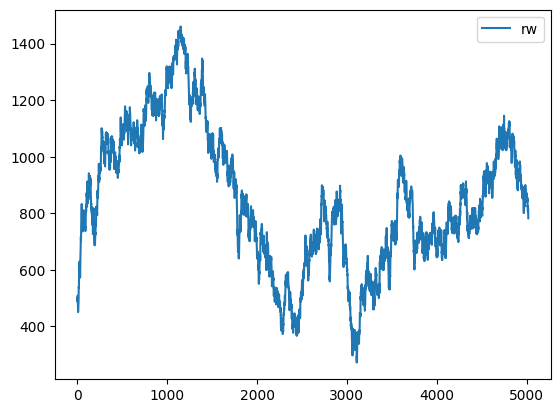

In [3]:
series.plot()

In [4]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller Test
X = series.rw
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.354659
p-value: 0.154945
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


## Part B:

In [5]:
import random

# Set the number of steps
num_steps = 5020

# Set the starting position
start_position = 500

# Initialize the walk with the starting position
walk = [start_position]

# Generate the random walk
for _ in range(num_steps):
  # Generate a random step (-1 or +1)
  step = random.choice([-10, 10])

  # Calculate the new position
  position = walk[-1] + step

  # Append the new position to the walk
  walk.append(position)

series['rw_2'] = walk

<Axes: >

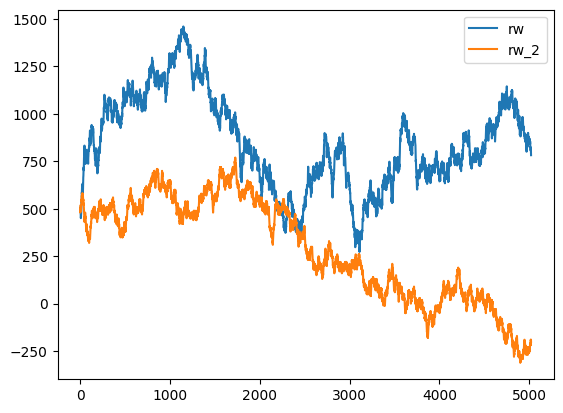

In [6]:
series.plot()

In [7]:
# Augmented Dickey-Fuller Test
X_2 = series.rw_2
result_2 = adfuller(X_2)
print('ADF Statistic: %f' % result_2[0])
print('p-value: %f' % result_2[1])
print('Critical Values:')
for key, value in result_2[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.783537
p-value: 0.823910
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


# Question 2:

White noise is a type of time series where data doesn’t follow any pattern, and is a sequence of random numbers where every value is associated with a time period. Random Walk is another type of time series data in which values tend to persist over time but the difference between the consecutive values is simply white noise. A random walk is integrated white noise, and vice versa we get a white noise when we differentiate/difference a random walk [[2](https://varshasaini.in/questions/what-is-the-difference-between-white-noise-and-random-walk/)].

White noise is a stationary time series because it has constant mean and variance over time. Random walk is not a stationary time series because its mean and variance change over time [[3](https://stats.stackexchange.com/questions/246357/why-is-a-random-walk-not-a-stationary-process)].

# Question 3:

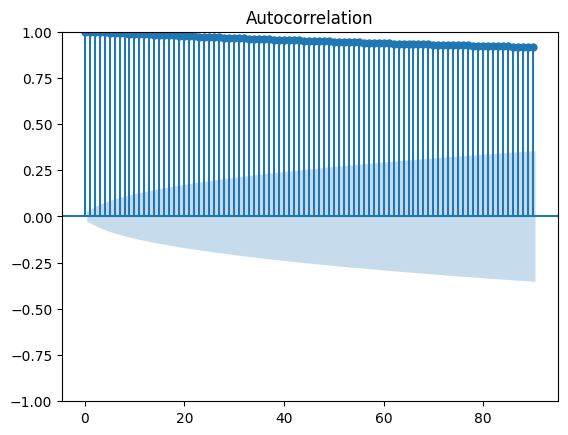

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plot_acf(X_2, lags=90)
plt.show()

# Question 4:

In [9]:
index = pd.read_csv('/content/Index2018.csv')

# Compute Returns for spx
index['spx_return'] = index.spx.pct_change(1)

In [10]:
index.head()

,date,spx,dax,ftse,nikkei,spx_return
0,07/01/1994,469.90,2224.95,3445.98,18124.01,NaN
1,10/01/1994,475.27,2225.00,3440.58,18443.44,0.011428
2,11/01/1994,474.13,2228.10,3413.77,18485.25,-0.002399
3,12/01/1994,474.17,2182.06,3372.02,18793.88,0.000084
4,13/01/1994,472.47,2142.37,3360.01,18577.26,-0.003585


In [11]:
from statsmodels.tsa.arima.model import ARIMA

model_ret_ar_1 = ARIMA(index.spx_return[1:], order = (1,0,0))
results_ret_ar_1 = model_ret_ar_1.fit()
results_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             spx_return   No. Observations:                 6268
Model:                 ARIMA(1, 0, 0)   Log Likelihood               19205.880
Date:                Mon, 26 Jun 2023   AIC                         -38405.760
Time:                        12:57:55   BIC                         -38385.531
Sample:                             0   HQIC                        -38398.751
                               - 6268                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.570      0.010    8.35e-05       0.001
ar.L1         -0.0659      0.007     -9.079      0.000      -0.080      -0.052
sigma2         0.0001   9.69e-07    131.766      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             22054.59
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
model_ret_ar_2 = ARIMA(index.spx_return[1:], order = (2,0,0))
results_ret_ar_2 = model_ret_ar_2.fit()
results_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             spx_return   No. Observations:                 6268
Model:                 ARIMA(2, 0, 0)   Log Likelihood               19211.150
Date:                Mon, 26 Jun 2023   AIC                         -38414.301
Time:                        12:57:57   BIC                         -38387.328
Sample:                             0   HQIC                        -38404.955
                               - 6268                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.629      0.009    8.94e-05       0.001
ar.L1         -0.0686      0.007     -9.372      0.000      -0.083      -0.054
ar.L2         -0.0410      0.006     -6.850      0.000      -0.053      -0.029
sigma2         0.0001   1.02e-06    125.156      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             20606.94
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
model_ret_ar_3 = ARIMA(index.spx_return[1:], order = (3,0,0))
results_ret_ar_3 = model_ret_ar_3.fit()
results_ret_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             spx_return   No. Observations:                 6268
Model:                 ARIMA(3, 0, 0)   Log Likelihood               19211.558
Date:                Mon, 26 Jun 2023   AIC                         -38413.115
Time:                        12:58:00   BIC                         -38379.399
Sample:                             0   HQIC                        -38401.433
                               - 6268                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.636      0.008    9.01e-05       0.001
ar.L1         -0.0690      0.007     -9.446      0.000      -0.083      -0.055
ar.L2         -0.0418      0.006     -6.986      0.000      -0.054      -0.030
ar.L3         -0.0114      0.007     -1.595      0.111      -0.025       0.003
sigma2         0.0001   1.02e-06    125.165      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             20588.10
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
model_ret_ar_4 = ARIMA(index.spx_return[1:], order = (4,0,0))
results_ret_ar_4 = model_ret_ar_4.fit()
results_ret_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             spx_return   No. Observations:                 6268
Model:                 ARIMA(4, 0, 0)   Log Likelihood               19212.175
Date:                Mon, 26 Jun 2023   AIC                         -38412.351
Time:                        12:58:02   BIC                         -38371.891
Sample:                             0   HQIC                        -38398.331
                               - 6268                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.632      0.008    8.96e-05       0.001
ar.L1         -0.0692      0.007     -9.446      0.000      -0.084      -0.055
ar.L2         -0.0424      0.006     -7.081      0.000      -0.054      -0.031
ar.L3         -0.0123      0.007     -1.715      0.086      -0.026       0.002
ar.L4         -0.0140      0.007     -2.087      0.037      -0.027      -0.001
sigma2         0.0001   1.03e-06    124.158      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             20414.95
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
model_ret_ar_5 = ARIMA(index.spx_return[1:], order = (5,0,0))
results_ret_ar_5 = model_ret_ar_5.fit()
results_ret_ar_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             spx_return   No. Observations:                 6268
Model:                 ARIMA(5, 0, 0)   Log Likelihood               19216.488
Date:                Mon, 26 Jun 2023   AIC                         -38418.977
Time:                        12:58:05   BIC                         -38371.774
Sample:                             0   HQIC                        -38402.621
                               - 6268                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.715      0.007    9.75e-05       0.001
ar.L1         -0.0697      0.007     -9.431      0.000      -0.084      -0.055
ar.L2         -0.0428      0.006     -7.144      0.000      -0.055      -0.031
ar.L3         -0.0139      0.007     -1.925      0.054      -0.028       0.000
ar.L4         -0.0167      0.007     -2.481      0.013      -0.030      -0.004
ar.L5         -0.0371      0.006     -6.151      0.000      -0.049      -0.025
sigma2         0.0001   1.03e-06    123.233      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             19857.00
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
model_ret_ar_6 = ARIMA(index.spx_return[1:], order = (6,0,0))
results_ret_ar_6 = model_ret_ar_6.fit()
results_ret_ar_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             spx_return   No. Observations:                 6268
Model:                 ARIMA(6, 0, 0)   Log Likelihood               19217.183
Date:                Mon, 26 Jun 2023   AIC                         -38418.366
Time:                        12:58:14   BIC                         -38364.420
Sample:                             0   HQIC                        -38399.674
                               - 6268                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.751      0.006       0.000       0.001
ar.L1         -0.0702      0.007     -9.509      0.000      -0.085      -0.056
ar.L2         -0.0431      0.006     -7.182      0.000      -0.055      -0.031
ar.L3         -0.0141      0.007     -1.911      0.056      -0.029       0.000
ar.L4         -0.0173      0.007     -2.580      0.010      -0.030      -0.004
ar.L5         -0.0381      0.006     -6.273      0.000      -0.050      -0.026
ar.L6         -0.0149      0.007     -2.268      0.023      -0.028      -0.002
sigma2         0.0001   1.03e-06    123.226      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             19892.94
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
model_ret_ar_7 = ARIMA(index.spx_return[1:], order = (7,0,0))
results_ret_ar_7 = model_ret_ar_7.fit()
results_ret_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             spx_return   No. Observations:                 6268
Model:                 ARIMA(7, 0, 0)   Log Likelihood               19222.097
Date:                Mon, 26 Jun 2023   AIC                         -38426.194
Time:                        12:58:24   BIC                         -38365.505
Sample:                             0   HQIC                        -38405.165
                               - 6268                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      2.846      0.004       0.000       0.001
ar.L1         -0.0708      0.007     -9.615      0.000      -0.085      -0.056
ar.L2         -0.0446      0.006     -7.441      0.000      -0.056      -0.033
ar.L3         -0.0148      0.007     -1.987      0.047      -0.029      -0.000
ar.L4         -0.0179      0.007     -2.619      0.009      -0.031      -0.004
ar.L5         -0.0398      0.006     -6.248      0.000      -0.052      -0.027
ar.L6         -0.0177      0.007     -2.696      0.007      -0.031      -0.005
ar.L7         -0.0396      0.006     -6.120      0.000      -0.052      -0.027
sigma2         0.0001   1.04e-06    122.629      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             19707.38
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


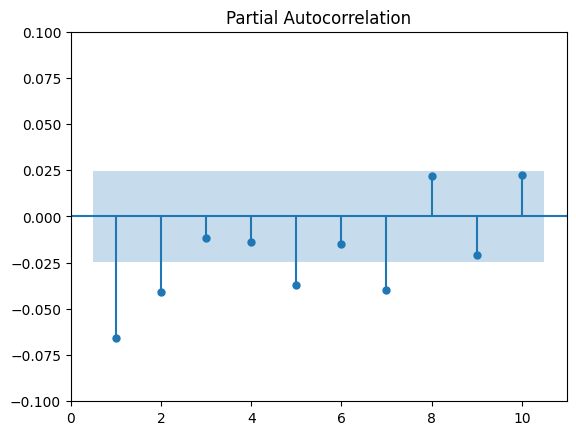

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(index.spx_return[1:], lags=10, zero=False)
plt.ylim(-0.1, 0.1)
plt.show()

# Question 5:

The duality between AR(1) and MA(∞) states that there is an equivalence between the two, and that we can write X_t as X_t = ∑_{j=0}^{∞} ϕ_j ε_{t-j} for an AR(1) process1.

If we let k → ∞, we get X_t = lim_{k→∞} (ϕ_k X_{t-k} + ∑_{j=0}^k ϕ_j ε_{t-j}) = lim_{k→∞} (ϕ_k X_{t-k}) + ∑_{j=0}^{∞} ϕ_j ε_{t-j}.

Similarly, for an MA(1) process, we can write X_t = ε_t + θε_{t-1}. If we let k → ∞, we get X_t = lim_{k→∞} (ε_t + θε_{t-1} + … + θ^k ε_{t-k}) = ε_t + θε_{t-1} + θ^2 ε_{t-2} + … = ∑_{j=0}^{∞} θ^j ε_{t-j}.

So MA(1) is equivalent to AR(∞), and MA(∞) is equivalent to AR(1) [[4](https://stats.stackexchange.com/questions/358162/writing-ar1-as-a-ma-infty-process)].

# Question 6:

In [19]:
# Compute returns for ftse
index['ftse_return'] = index.ftse.pct_change(1)

In [20]:
index.head()

,date,spx,dax,ftse,nikkei,spx_return,ftse_return
0,07/01/1994,469.90,2224.95,3445.98,18124.01,NaN,NaN
1,10/01/1994,475.27,2225.00,3440.58,18443.44,0.011428,-0.001567
2,11/01/1994,474.13,2228.10,3413.77,18485.25,-0.002399,-0.007792
3,12/01/1994,474.17,2182.06,3372.02,18793.88,0.000084,-0.012230
4,13/01/1994,472.47,2142.37,3360.01,18577.26,-0.003585,-0.003562


In [21]:
# Moving Average 8
model_ret_ma_8 = ARIMA(index.ftse_return[1:], order = (0,0,8))
results_ret_ma_8 = model_ret_ma_8.fit()
results_ret_ma_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            ftse_return   No. Observations:                 6268
Model:                 ARIMA(0, 0, 8)   Log Likelihood               19315.977
Date:                Mon, 26 Jun 2023   AIC                         -38611.954
Time:                        12:58:45   BIC                         -38544.522
Sample:                             0   HQIC                        -38588.589
                               - 6268                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.453      0.146   -6.53e-05       0.000
ma.L1         -0.0195      0.008     -2.375      0.018      -0.036      -0.003
ma.L2         -0.0487      0.007     -6.758      0.000      -0.063      -0.035
ma.L3         -0.0689      0.007     -9.537      0.000      -0.083      -0.055
ma.L4          0.0327      0.008      4.296      0.000       0.018       0.048
ma.L5         -0.0530      0.007     -7.313      0.000      -0.067      -0.039
ma.L6         -0.0324      0.008     -4.067      0.000      -0.048      -0.017
ma.L7          0.0108      0.008      1.370      0.171      -0.005       0.026
ma.L8          0.0250      0.008      3.025      0.002       0.009       0.041
sigma2         0.0001   1.18e-06    104.175      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8785.59
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
# Moving Average 8
model_ret_ma_18 = ARIMA(index.ftse_return[1:], order = (0,0,18))
results_ret_ma_18 = model_ret_ma_18.fit()
results_ret_ma_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            ftse_return   No. Observations:                 6268
Model:                ARIMA(0, 0, 18)   Log Likelihood               19325.122
Date:                Mon, 26 Jun 2023   AIC                         -38610.243
Time:                        12:59:41   BIC                         -38475.379
Sample:                             0   HQIC                        -38563.512
                               - 6268                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.536      0.124   -5.14e-05       0.000
ma.L1         -0.0210      0.009     -2.468      0.014      -0.038      -0.004
ma.L2         -0.0469      0.007     -6.301      0.000      -0.061      -0.032
ma.L3         -0.0694      0.008     -9.050      0.000      -0.084      -0.054
ma.L4          0.0292      0.008      3.766      0.000       0.014       0.044
ma.L5         -0.0525      0.008     -6.972      0.000      -0.067      -0.038
ma.L6         -0.0304      0.008     -3.763      0.000      -0.046      -0.015
ma.L7          0.0128      0.008      1.561      0.118      -0.003       0.029
ma.L8          0.0240      0.008      2.916      0.004       0.008       0.040
ma.L9         -0.0002      0.008     -0.030      0.976      -0.016       0.016
ma.L10        -0.0157      0.008     -2.005      0.045      -0.031      -0.000
ma.L11        -0.0038      0.009     -0.437      0.662      -0.021       0.013
ma.L12        -0.0143      0.008     -1.701      0.089      -0.031       0.002
ma.L13         0.0031      0.008      0.367      0.714      -0.013       0.019
ma.L14        -0.0129      0.009     -1.456      0.145      -0.030       0.004
ma.L15        -0.0105      0.008     -1.262      0.207      -0.027       0.006
ma.L16         0.0199      0.009      2.298      0.022       0.003       0.037
ma.L17        -0.0032      0.009     -0.356      0.722      -0.021       0.014
ma.L18        -0.0414      0.008     -5.006      0.000      -0.058      -0.025
sigma2         0.0001   1.23e-06     99.617      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8964.61
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

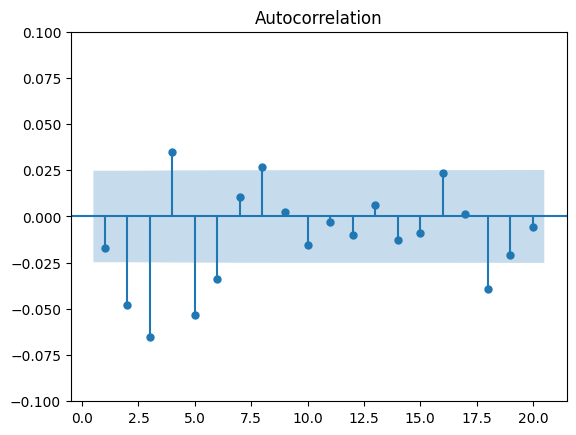

In [23]:
# ACF Plot
plot_acf(index.ftse_return[1:], lags=20, zero=False)
plt.ylim(-0.1, 0.1)
plt.show()

In [24]:
from scipy.stats.distributions import chi2

def LLR_test(model_1, model_2, df=1):
  L1 = model_1.fit().llf
  L2 = model_2.fit().llf
  LR = 2*(L2-L1)
  p = chi2.sf(LR, df).round(3)
  print('p-value: ' + str(p))

In [25]:
LLR_test(model_ret_ma_8, model_ret_ma_18, df=10)

p-value: 0.05


# Question 7:

In [26]:
# Moving Average 6
model_ret_ma_6 = ARIMA(index.ftse_return[1:], order = (0,0,6))
results_ret_ma_6 = model_ret_ma_6.fit()
results_ret_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            ftse_return   No. Observations:                 6268
Model:                 ARIMA(0, 0, 6)   Log Likelihood               19313.705
Date:                Mon, 26 Jun 2023   AIC                         -38611.410
Time:                        13:01:18   BIC                         -38557.464
Sample:                             0   HQIC                        -38592.717
                               - 6268                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.521      0.128   -5.38e-05       0.000
ma.L1         -0.0198      0.008     -2.457      0.014      -0.036      -0.004
ma.L2         -0.0497      0.007     -6.940      0.000      -0.064      -0.036
ma.L3         -0.0689      0.007     -9.660      0.000      -0.083      -0.055
ma.L4          0.0331      0.008      4.366      0.000       0.018       0.048
ma.L5         -0.0529      0.007     -7.378      0.000      -0.067      -0.039
ma.L6         -0.0324      0.008     -4.129      0.000      -0.048      -0.017
sigma2         0.0001   1.17e-06    105.084      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8868.95
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
index['residuals_ret_ma_6'] = results_ret_ma_6.resid[1:]
index['residuals_ret_ma_8'] = results_ret_ma_8.resid[1:]

In [28]:
index.head()

,date,spx,dax,ftse,nikkei,spx_return,ftse_return,residuals_ret_ma_6,residuals_ret_ma_8
0,07/01/1994,469.90,2224.95,3445.98,18124.01,NaN,NaN,NaN,NaN
1,10/01/1994,475.27,2225.00,3440.58,18443.44,0.011428,-0.001567,NaN,NaN
2,11/01/1994,474.13,2228.10,3413.77,18485.25,-0.002399,-0.007792,-0.008010,-0.008009
3,12/01/1994,474.17,2182.06,3372.02,18793.88,0.000084,-0.012230,-0.012645,-0.012644
4,13/01/1994,472.47,2142.37,3360.01,18577.26,-0.003585,-0.003562,-0.004515,-0.004517


In [29]:
print("The mean of the residuals is " + str(index.residuals_ret_ma_6.mean()) +
      "\nThe variance of the residuals is " + str(index.residuals_ret_ma_6.var()))

The mean of the residuals is 4.794869484975794e-06
The variance of the residuals is 0.0001233847329342349


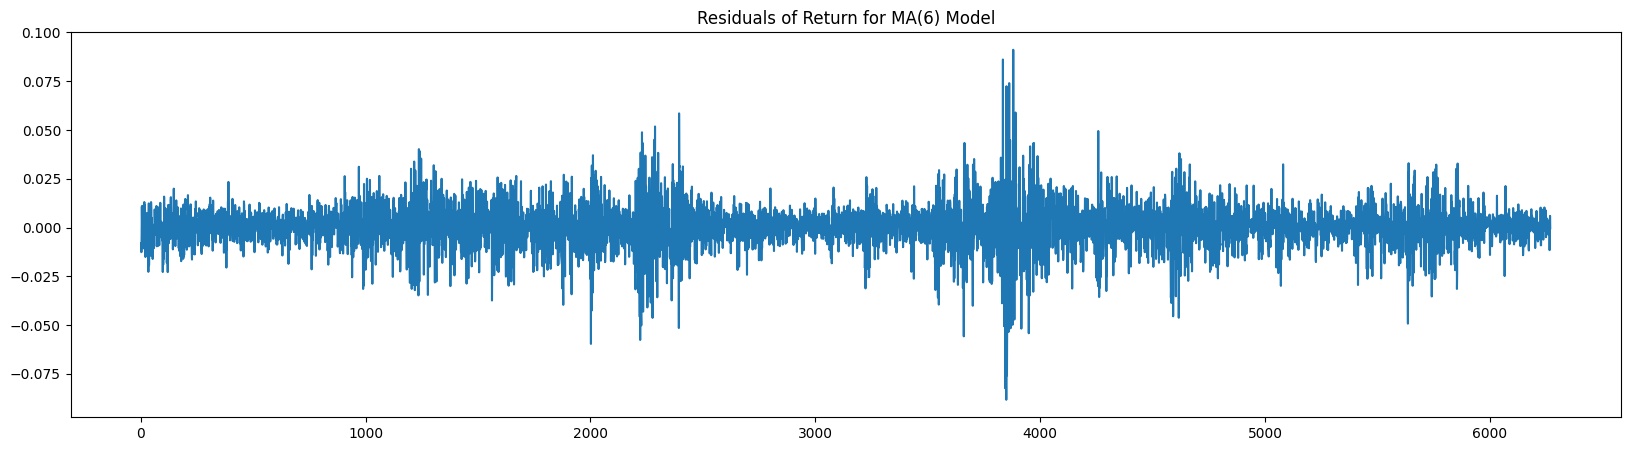

In [30]:
index.residuals_ret_ma_6[1:].plot(figsize = (20, 5))
plt.title('Residuals of Return for MA(6) Model')
plt.show()

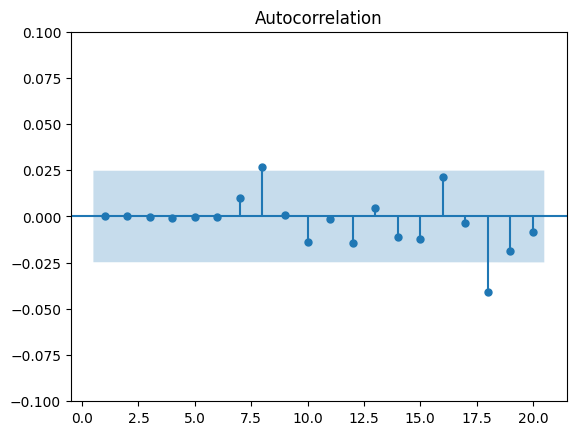

In [31]:
# ACF Plot
plot_acf(index.residuals_ret_ma_6[2:], lags=20, zero=False)
plt.ylim(-0.1, 0.1)
plt.show()

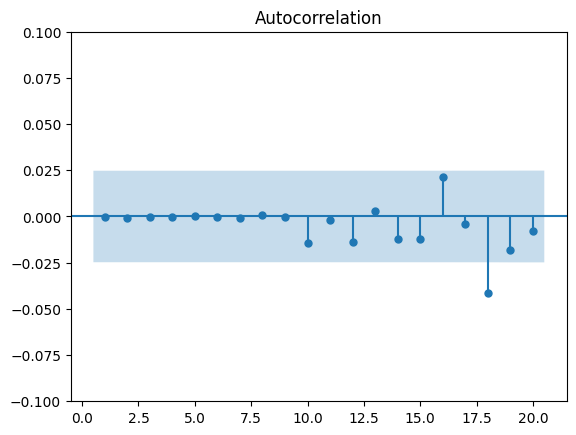

In [32]:
# ACF Plot
plot_acf(index.residuals_ret_ma_8[2:], lags=20, zero=False)
plt.ylim(-0.1, 0.1)
plt.show()